<a href="https://colab.research.google.com/github/ChristianKitte/HelloRegression/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Bibliotheken verfügbar machen

import numpy as np
import pandas as pd

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline
import matplotlib.pyplot as plot

print("Bibliotheken verfügbar...")


Bibliotheken verfügbar...


Fiktiver Kontext:

An freien Mitarbeitern werden Aufträge vergeben, welche nach vorheriger Absprache von diesen zu erledigen sind. Es ist normal, dass es eine Reihe von Gründen gibt, warum diese nicht erfolgreich sind. Nicht immer sind diese von den Mitarbeitern zu vertreten. Ein Auftrag wurde erfolgreich erledigt, sofern er fristgerecht und korrekt zur weiteren Verwendung vorliegt.

Die Daten sind auf GitHub als CSV Datei verfügbar (Link siehe unten).

In [ ]:
# Daten von GitHub besorgen und Überschriften zur besseren Übersicht anpassen

ds=pd.read_csv("https://raw.githubusercontent.com/ChristianKitte/HelloRegression/main/Auftraege.csv")
ds=ds.rename(columns={"Anzahl angenommene Aufträge":"Aufträge","Anzahl erfolgreiche Ausführung":"erfolgreich"})

print("Daten wurden geholt...")
print("")

ds

Daten wurden geholt...



,Aufträge,erfolgreich
0,1,1
1,4,4
2,6,6
3,2,2
4,4,4
5,9,8
6,5,5
7,2,2
8,8,7
9,4,2


Text(0.5, 0.98, 'Oben Aufträge, unten Anzahl erfolgreich ausgeführt')

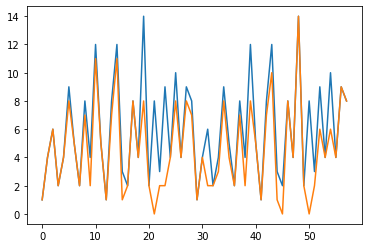

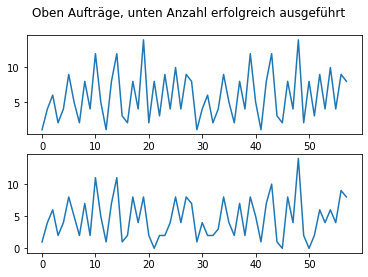

In [ ]:
# Die Daten sollen in einem Diagramm angezeicht werden
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html?highlight=iloc#pandas.DataFrame.iloc
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.describe.html

# 1. X (Aufträge) und Y (Anzahl erfolgreich) Spalten erzeugen
x= ds.iloc[:,0].values
y= ds.iloc[:,1].values

#print(x)
#print(y)

#stats.describe(y)

plot.plot(ds)

fig, (ax1, ax2) = plot.subplots(2, 1)
ax1.plot(x)
ax2.plot(y)
fig.suptitle('Oben Aufträge, unten Anzahl erfolgreich ausgeführt')

In [ ]:
# Aufsplitten des DS n ein TrainingsSet (train) und ein TestSet (test)
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=1/7, random_state=0)
print(x_train)
print(y_train)

[14  4 12  1  5  2  1  8  2 12  6  8  9  9  4 10  4  3  9  4  2  2  2  8
  8  8 10  8 12  8  3  4  4  1  8  4  5  9  2  8 14  4 12  4  2  1  4  4
  3]
[14  4 11  1  5  2  1  7  2 11  2  7  9  6  4  6  4  1  8  4  2  2  2  0
  7  7  8  8 10  8  2  2  4  1  8  4  5  2  2  0  8  2  8  4  2  1  4  4
  1]


Ermittelter Koeffizient:  [0.73681285]


Text(0.5, 1.0, 'Ergebnis der Vorhersage')

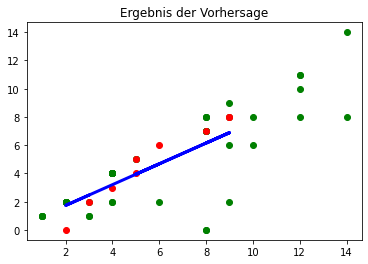

In [ ]:
# Durchführen der eigentlichen linearen Regression
# https://stephanosterburg.gitbook.io/scrapbook/coding/python/what-does-1-mean-in-numpy-reshape
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

linReg=LinearRegression()
linReg.fit(x_train.reshape(-1,1) ,y_train)

print("Ermittelter Koeffizient: ",linReg.coef_)

testPredict= linReg.predict(x_test.reshape(-1,1))

plot.scatter(x_train, y_train,  color='green')
plot.scatter(x_test, y_test,  color='red')
plot.plot(x_test, testPredict, color='blue', linewidth=3)

plot.title("Ergebnis der Vorhersage")

Die Grünen Punkte sind die zum Training verwendeten Daten, die Roten die im Test verwendeten Daten. Der tatsächliche Regressionsgraph (auf Basis der Testdaten) ist in blau eingetragen.

Der Koeffizient kann zwischen 0 und 1 liegen und negativ sein. Hier beträgt er 0,7. Er ist positiv, daher der Anstieg der Geraden. In der Praxis bedeutet dies, dass es eine positive Relation gibt. Je mehr Aufträge erteilt wurden, umso höher war tendenziell die erfolgreiche Ausführung.

Der Wert 0,7 ist eher weniger gut, jedoch sind bei den Daten eine Reihe Ausreißer (dies kommt in der Praxis durchaus vor). Hier könnte durch mehr Daten oder aber dem Ausschluss der Ausreißer die Vorhersage verbessert werden.

Würde es sich bei näherer Betrachtung herausstellen, dass solche Ausreißer beispielsweise durch Ausscheiden des Mitarbeiter, einer Fehlerhaften Vergabe etc. verursacht würden, würden deren nicht Berücksichtigung das Ergebnis genauer machen.

Grundsätzlich entspricht der Graph dem erwarteten Ergebnis: In der Tendenz bedeuten mehr Aufträge mehr erfolgreiche Durchführungen. Die Streuung ist den bewust großen Schwankungen zuzurechnen.